<a href="https://colab.research.google.com/github/MohamedAlaaEldinFarghaly/OpenCV-For-Image-Processing/blob/master/detect_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [ ]:
uploaded = upload_files()

Saving 20200711_052219.jpg to 20200711_052219 (1).jpg


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read image
img = cv2.imread("20200711_052723.jpg")

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f17e8b9dac8>)

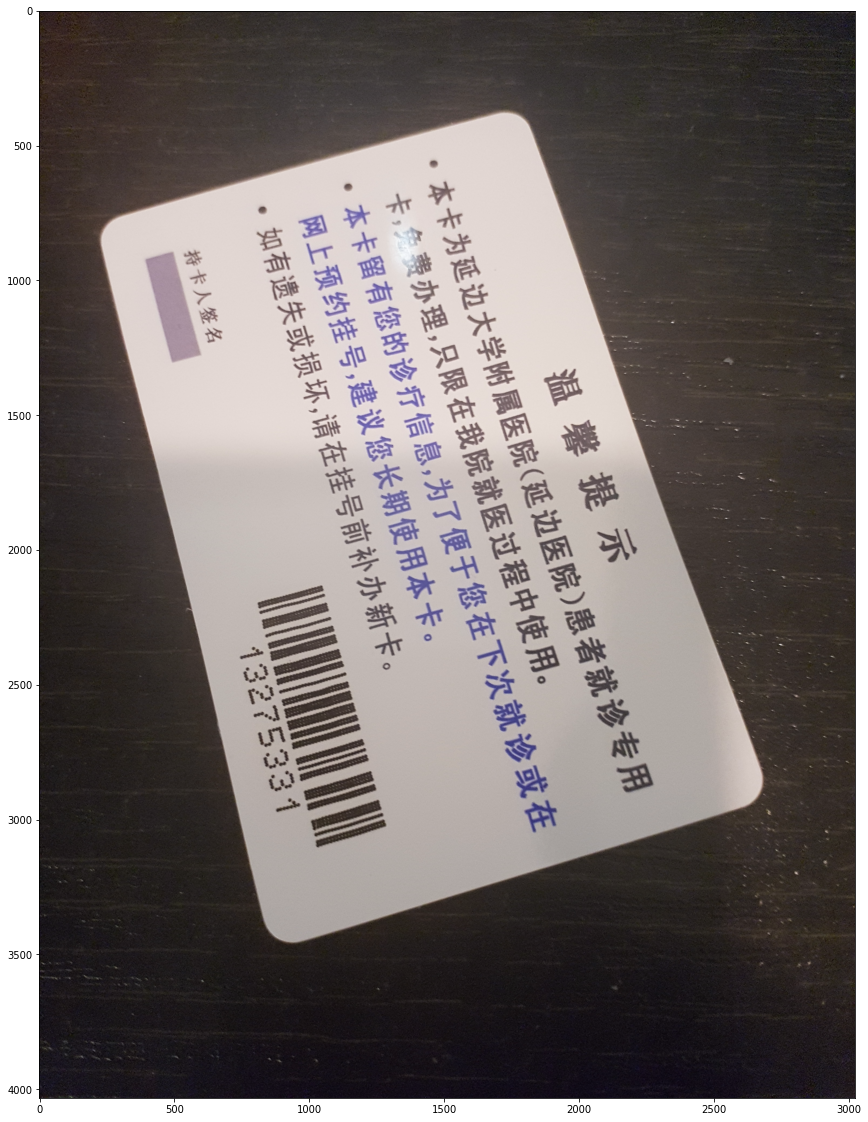

In [ ]:
plt.figure(figsize=(20,20)),plt.imshow(img)

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f17e8d31390>)

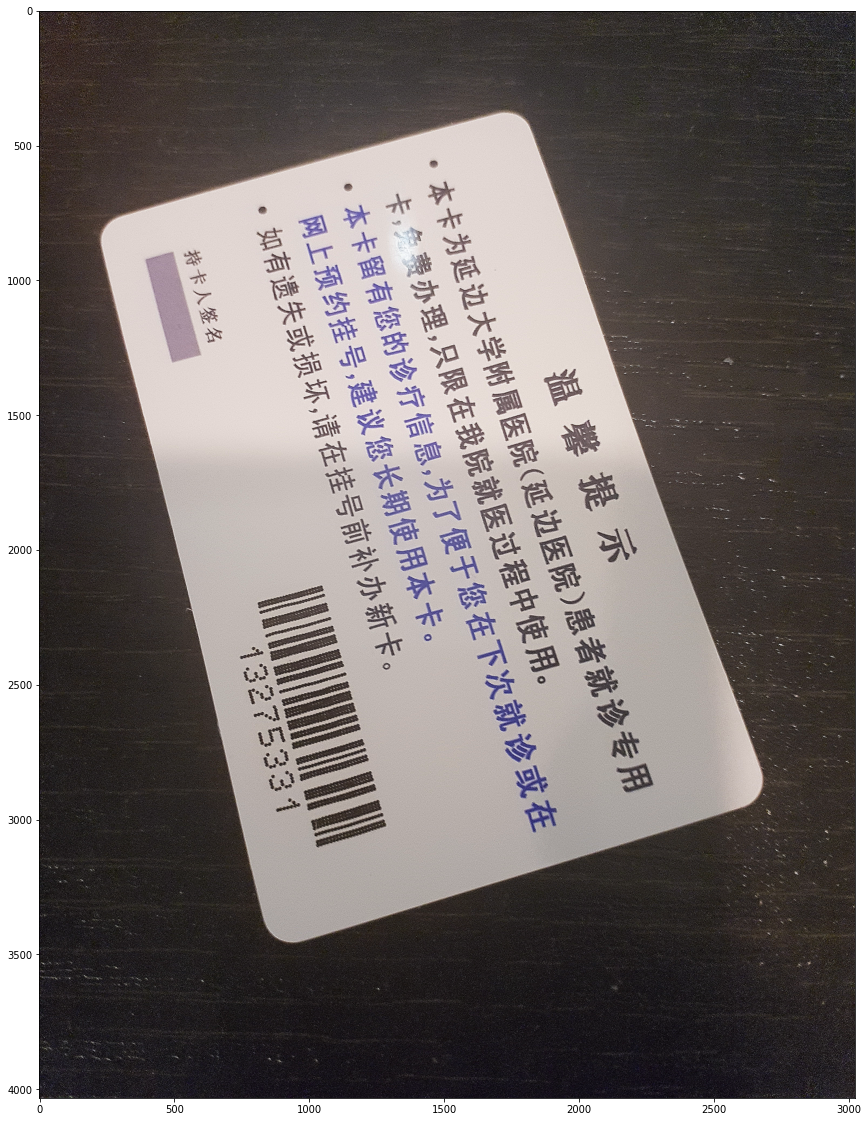

In [ ]:
# Creating our sharpening filter
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Creating maxican hat filter
#filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
# Applying cv2.filter2D function on our Cybertruck image
final=cv2.filter2D(img,-1,filter)
plt.figure(figsize=(20,20)),plt.imshow(final)

98.96476378456475
4902390.5
4867239.5
16370.5
11234.0
14847.0
10294.0
10092.5
12417.0
12228.5
11096.0


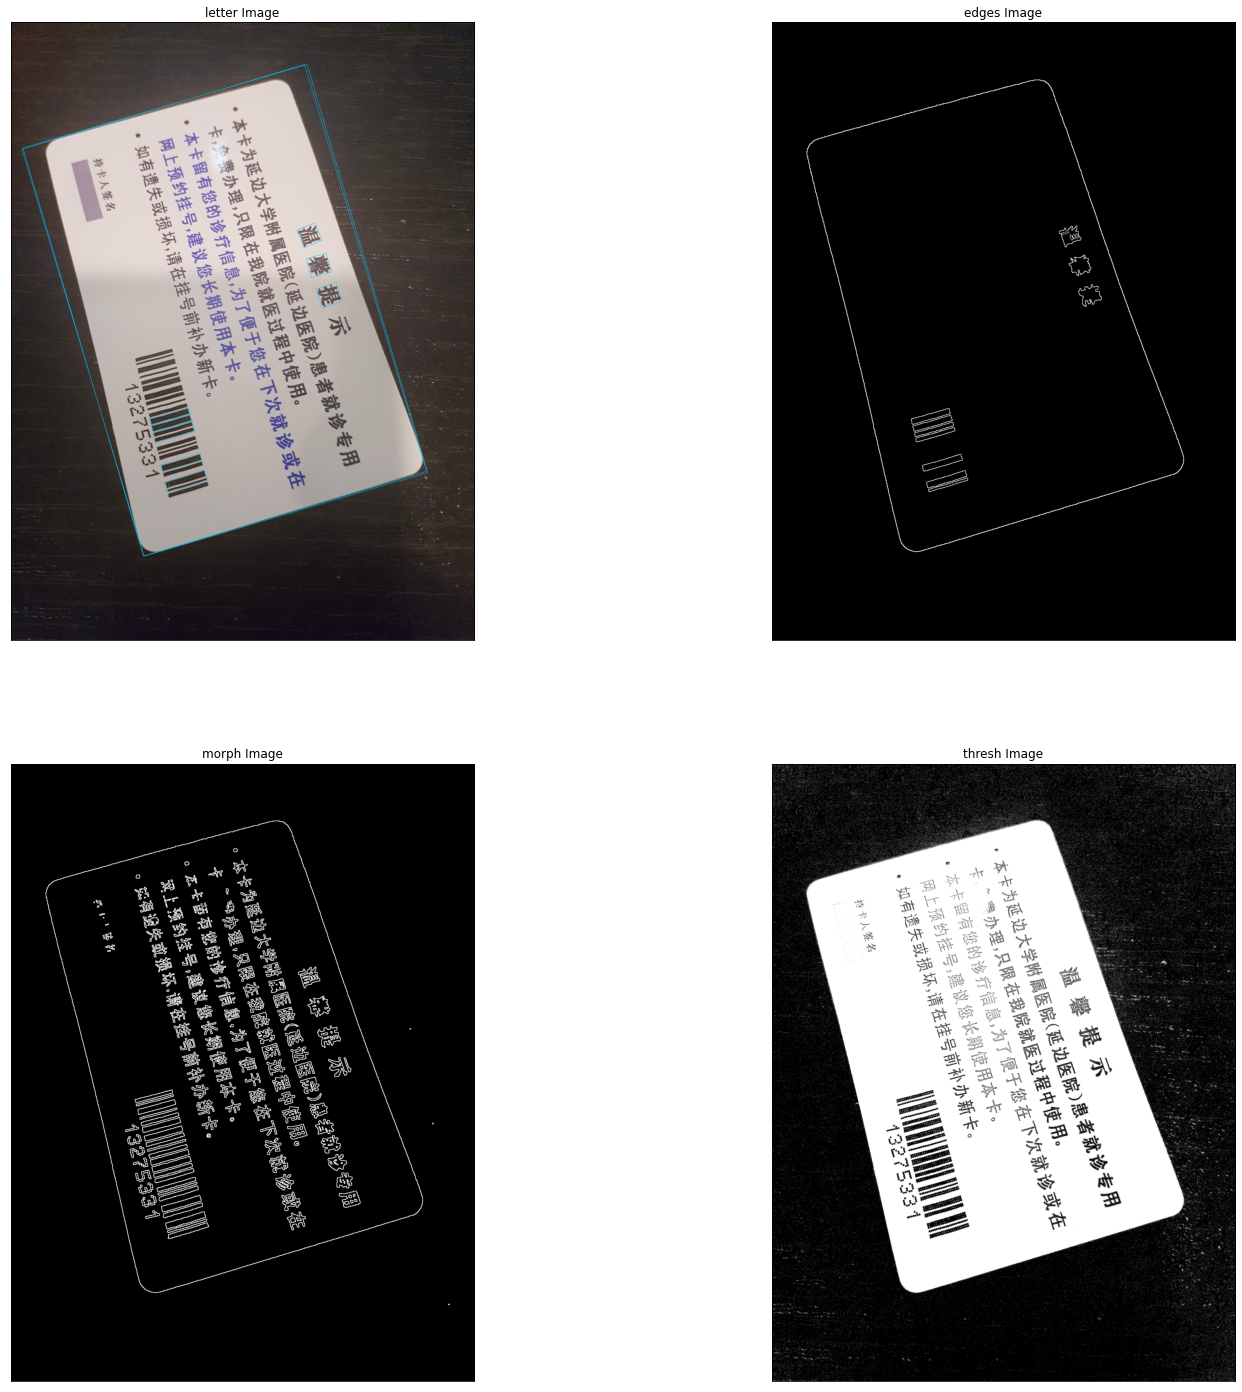

In [ ]:
gray = cv2.cvtColor(final,cv2.COLOR_BGR2GRAY)
#edges = cv2.Canny(gray, 200, 200)
  
thr=np.mean(gray) 
print(thr)
thresh = cv2.threshold(gray,thr,255,cv2.THRESH_BINARY)[1]


# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_GRADIENT, kernel)


# find contours - write black over all small contours
letter = morph.copy()
imgc = img.copy()
cntrs = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
s=letter.shape
min_area=(s[0]/4)*(s[1]/4)
for c in cntrs:
    area = cv2.contourArea(c)
    if area < 10000 :
        cv2.drawContours(letter,[c],0,(0,0,0),-1)
    else:
        print(area)
        
        
        ## draw rotated rectangle
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(imgc,[box],0,(0,191,255),2)
        ## draw rotated rectangle

    
# do canny edge detection
#edges = cv2.Canny(letter, 200, 200)

# display results
plt.figure(figsize=(25,25))
plt.subplot(221), plt.imshow(imgc, cmap='gray')
plt.title('letter Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(letter, cmap='gray')
plt.title('edges Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(morph, cmap='gray')
plt.title('morph Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(thresh, cmap='gray')
plt.title('thresh Image'), plt.xticks([]), plt.yticks([])
plt.show()
